DAT405 Assignment 4

Noah Lanai - 9808252192 - 12h work

Carl Hjalmarsson - 9305198930 - 12h work

In [45]:
# Importing libraries
import nbdime
import pandas as pd
import tarfile
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Problem **1 a)** and **b)**

In [46]:
# Extract files and convert to a dataframe. Label "ham" and "spam" for readability
def extract_files(files, m_class):  
    rows = []
    for fname in files:
        tfile = tarfile.open(fname, 'r:bz2')
        for member in tfile.getmembers():
            f = tfile.extractfile(member)
            if f is not None:
                row = f.read()
                rows.append({'message': row.decode('latin-1'), 'class': m_class})
        tfile.close()
    return pd.DataFrame(rows)

# Get data for different class of email
ham_df = extract_files(['./20021010_easy_ham.tar.bz2','./20021010_hard_ham.tar.bz2'], 'ham')
spam_df = extract_files(['./20021010_spam.tar.bz2'], 'spam')

# Get data for each type of ham
eazy_ham_df = extract_files(['./20021010_easy_ham.tar.bz2'], 'ham')
hard_ham_df = extract_files(['./20021010_hard_ham.tar.bz2'], 'ham')

# Split up data into train and test
hamtrain, hamtest = train_test_split(ham_df, test_size = 0.25, random_state = 0)
spamtrain, spamtest = train_test_split(spam_df, test_size = 0.25, random_state = 0)

# Merge data to one big set
train_data = pd.concat([hamtrain, spamtrain])
test_data = pd.concat([hamtest, spamtest])

# Add spam to ham
eazy_hamspam_df = pd.concat([eazy_ham_df, spam_df])
hard_hamspam_df = pd.concat([hard_ham_df, spamtrain])

# Replacing classes with binary numbers
to_replace = {'ham': 0, 'spam': 1}
train_data.replace(to_replace, inplace=True)
test_data.replace(to_replace, inplace=True)
eazy_hamspam_df.replace(to_replace, inplace=True)
hard_hamspam_df.replace(to_replace, inplace=True)

# Resetting index
train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)
eazy_hamspam_df.reset_index(drop=True, inplace=True)
hard_hamspam_df.reset_index(drop=True, inplace=True)

### Problem **2 a)** and **b)**

Accuracy score for the multinomial naive Bayes classifier:
 0.9794437726723095


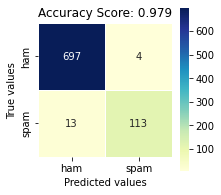

True poitive rate: 0.8968253968253969, true negative rate: 0.9942938659058488

Accuracy scorefor the Bernoulli naive Bayes classifier:
 0.8875453446191052


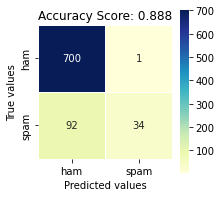

True poitive rate: 0.2698412698412698, true negative rate: 0.9985734664764622



In [47]:
# Fit nultinomial and Bernoulli naive Bayes classifiers
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_data['message']).toarray()
y_train = train_data['class']
X_test = vectorizer.transform(test_data['message']).toarray()
y_test = test_data['class']

# Laplace smoothing, alpha=1
mnb = MultinomialNB(alpha = 1)
mnb.fit(X_train, y_train)

# binarize with value of 0
bernb = BernoulliNB(binarize = 0)
bernb.fit(X_train, y_train)

# Run multinomial and Bernoulli naive Bayes classifiers
mnb_predict = mnb.predict(X_test)
print("Accuracy score for the multinomial naive Bayes classifier:\n", metrics.accuracy_score(y_test, mnb_predict))

cm = metrics.confusion_matrix(y_test, mnb_predict)
xAxisLabels = ('ham', 'spam')
yAxisLabels = ('ham', 'spam')
plt.figure(figsize = (3,3))
sns.heatmap(cm, annot = True, fmt = "d", linewidths=.5, square=True, xticklabels=xAxisLabels, yticklabels=yAxisLabels, cmap="YlGnBu")
plt.xlabel("Predicted values")
plt.ylabel("True values")
allSampleTitle = 'Accuracy Score: %.3f' % metrics.accuracy_score(y_test, mnb_predict)
plt.title(allSampleTitle, size = 12)
plt.show()

TN, FN, TP, FP = cm[0][0], cm[1][0], cm[1][1], cm[0][1]
TPR, TNR = TP/(TP+FN), TN/(TN+FP)
print("True poitive rate: {}, true negative rate: {}\n".format(TPR, TNR))

bernb_predict = bernb.predict(X_test)
print("Accuracy scorefor the Bernoulli naive Bayes classifier:\n", metrics.accuracy_score(y_test, bernb_predict))

cm = metrics.confusion_matrix(y_test, bernb_predict)
xAxisLabels = ('ham', 'spam')
yAxisLabels = ('ham', 'spam')
plt.figure(figsize = (3,3))
sns.heatmap(cm, annot = True, fmt = "d", linewidths=.5, square=True, xticklabels=xAxisLabels, yticklabels=yAxisLabels, cmap="YlGnBu")
plt.xlabel("Predicted values")
plt.ylabel("True values")
allSampleTitle = 'Accuracy Score: %.3f' % metrics.accuracy_score(y_test, bernb_predict)
plt.title(allSampleTitle, size = 12)
plt.show()

TN, FN, TP, FP = cm[0][0], cm[1][0], cm[1][1], cm[0][1]
TPR, TNR = TP/(TP+FN), TN/(TN+FP)
print("True poitive rate: {}, true negative rate: {}\n".format(TPR, TNR))

#### **Differences between models**
The multinomial naive Bayes model implements the naive Bayes algorithm for multinomially distributed data, which is a generalisation of the binomial distribution. For n number of trials it calculates the probability of **x_k** number of successes for **k** different features, i.e. the probability of finding **k** different words in the same text **x_k** number of times. The algorithm calculates the maximum likelihood of a specific word occuring given a specified class, to be used in the naive Bayes formula, based on word count vectors. If a word does not occur it is ignored in the calculation of the maximum likelihood.

The Bernoulli naive Bayes model implements the naive Bayes algorithm for multivariate Bernoulli distributed data, which means that each feature has to be condensed to a binary value, which is done using the binarize parameter to provide a threshold for feature count. This gives binary-valued feature vectors, meaning that the word counts for each individual word is condensed to either 1 or 0 depending on the threshold. The algorithm calculates the likelihood of a specific word occuring, to be used in the naive Bayes formula, based on these binary-valued feature vectors. This version of calculating the maximum likelihood also penalizes non-occurrence of a word.

The main differences are the distributions used to calculate the probability terms of the naive Bayes formula. Adding to this, the main difference seems to be in how it calculates the likelihood terms, and what inputs to use for this calculation; the feature vectors.

#### **Choice of binarize**
The Bernoulli model seemed to fair worse when increasing the binarize variable from the default value of 0, which is why we decided to keep the default value.

#### Differences in performance
Referring to the scikit-learn.org page, it states that the Bernoulli naive Bayes model might perform better on some datasets, especially those with shorter documents. We found this not to be the case when comparing since email messages are usually quite short in comparison to other texts. When discarding the word counts we lose information. If we for example set the binary parameter to two, then every word that occurs once will be set to zero. These words will not be included in the classification which might impact the result. For example if the word "invest" occurs one time in an email. This will not necessarily increase the probability of spam.

### 3 **i. and ii.**

Eazy ham vs spam: Accuracy score for the multinomial naive Bayes classifier:
 0.9941022280471822


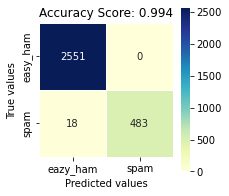

True poitive rate: 0.9640718562874252, true negative rate: 1.0

Hard ham vs spam: Accuracy score for the multinomial naive Bayes classifier:
 0.9792


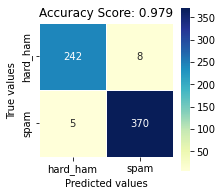

True poitive rate: 0.9866666666666667, true negative rate: 0.968

Eazy ham vs spam: Accuracy score for the Bernoulli naive Bayes classifier:
 0.9046526867627785


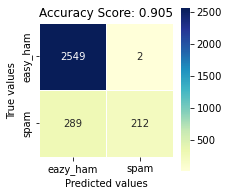

True poitive rate: 0.4231536926147705, true negative rate: 0.9992159937279498

Hard ham vs spam: Accuracy score for the Bernoulli naive Bayes classifier:
 0.6736


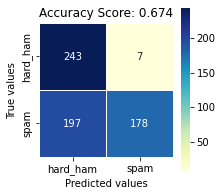

True poitive rate: 0.4746666666666667, true negative rate: 0.972



In [48]:
X_eazy = vectorizer.transform(eazy_hamspam_df['message']).toarray()
y_eazy = eazy_hamspam_df['class']

X_hard = vectorizer.transform(hard_hamspam_df['message']).toarray()
y_hard = hard_hamspam_df['class']

# Multinomial for eazy ham and hard ham

mnb_predict = mnb.predict(X_eazy)
print("Eazy ham vs spam: Accuracy score for the multinomial naive Bayes classifier:\n", metrics.accuracy_score(y_eazy, mnb_predict))

cm = metrics.confusion_matrix(y_eazy, mnb_predict)
xAxisLabels = ('eazy_ham', 'spam')
yAxisLabels = ('easy_ham', 'spam')
plt.figure(figsize = (3,3))
sns.heatmap(cm, annot = True, fmt = "d", linewidths=.5, square=True, xticklabels=xAxisLabels, yticklabels=yAxisLabels, cmap="YlGnBu")
plt.xlabel("Predicted values")
plt.ylabel("True values")
allSampleTitle = 'Accuracy Score: %.3f' % metrics.accuracy_score(y_eazy, mnb_predict)
plt.title(allSampleTitle, size = 12)
plt.show()

TN, FN, TP, FP = cm[0][0], cm[1][0], cm[1][1], cm[0][1]
TPR, TNR = TP/(TP+FN), TN/(TN+FP)
print("True poitive rate: {}, true negative rate: {}\n".format(TPR, TNR))

mnb_predict = mnb.predict(X_hard)
print("Hard ham vs spam: Accuracy score for the multinomial naive Bayes classifier:\n", metrics.accuracy_score(y_hard, mnb_predict))

cm = metrics.confusion_matrix(y_hard, mnb_predict)
xAxisLabels = ('hard_ham', 'spam')
yAxisLabels = ('hard_ham', 'spam')
plt.figure(figsize = (3,3))
sns.heatmap(cm, annot = True, fmt = "d", linewidths=.5, square=True, xticklabels=xAxisLabels, yticklabels=yAxisLabels, cmap="YlGnBu")
plt.xlabel("Predicted values")
plt.ylabel("True values")
allSampleTitle = 'Accuracy Score: %.3f' % metrics.accuracy_score(y_hard, mnb_predict)
plt.title(allSampleTitle, size = 12)
plt.show()

TN, FN, TP, FP = cm[0][0], cm[1][0], cm[1][1], cm[0][1]
TPR, TNR = TP/(TP+FN), TN/(TN+FP)
print("True poitive rate: {}, true negative rate: {}\n".format(TPR, TNR))

# Bernoulli for eazy ham and hard ham
bernb_predict = bernb.predict(X_eazy)
print("Eazy ham vs spam: Accuracy score for the Bernoulli naive Bayes classifier:\n", metrics.accuracy_score(y_eazy, bernb_predict))

cm = metrics.confusion_matrix(y_eazy, bernb_predict)
xAxisLabels = ('eazy_ham', 'spam')
yAxisLabels = ('easy_ham', 'spam')
plt.figure(figsize = (3,3))
sns.heatmap(cm, annot = True, fmt = "d", linewidths=.5, square=True, xticklabels=xAxisLabels, yticklabels=yAxisLabels, cmap="YlGnBu")
plt.xlabel("Predicted values")
plt.ylabel("True values")
allSampleTitle = 'Accuracy Score: %.3f' % metrics.accuracy_score(y_eazy, bernb_predict)
plt.title(allSampleTitle, size = 12)
plt.show()

TN, FN, TP, FP = cm[0][0], cm[1][0], cm[1][1], cm[0][1]
TPR, TNR = TP/(TP+FN), TN/(TN+FP)
print("True poitive rate: {}, true negative rate: {}\n".format(TPR, TNR))

bernb_predict = bernb.predict(X_hard)
print("Hard ham vs spam: Accuracy score for the Bernoulli naive Bayes classifier:\n", metrics.accuracy_score(y_hard, bernb_predict))

cm = metrics.confusion_matrix(y_hard, bernb_predict)
xAxisLabels = ('hard_ham', 'spam')
yAxisLabels = ('hard_ham', 'spam')
plt.figure(figsize = (3,3))
sns.heatmap(cm, annot = True, fmt = "d", linewidths=.5, square=True, xticklabels=xAxisLabels, yticklabels=yAxisLabels, cmap="YlGnBu")
plt.xlabel("Predicted values")
plt.ylabel("True values")
allSampleTitle = 'Accuracy Score: %.3f' % metrics.accuracy_score(y_hard, bernb_predict)
plt.title(allSampleTitle, size = 12)
plt.show()

TN, FN, TP, FP = cm[0][0], cm[1][0], cm[1][1], cm[0][1]
TPR, TNR = TP/(TP+FN), TN/(TN+FP)
print("True poitive rate: {}, true negative rate: {}\n".format(TPR, TNR))

#### Differences in performance
The best accuracy score was for the naive Bayes classifier for eazy ham. The data set was predicted with over 99% accuracy. Eazy ham had the best score for both the methods. The lowest accuracy score where the Bernoulli naive Bayes classifier for the hard ham data set. The conclution is that the best method to use is the multinomial naive Bayes classifier, since it performs best for both data sets, and that eazy ham is easier for the computer to predict.